In [78]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Сгенерируйте выборку 𝑋1, ..., 𝑋𝑁 из равномерного распределения на отрезке [0, 𝜃] для 𝑁 = 10^4

In [79]:
theta = 10.
samples = sts.uniform.rvs(size=10000, loc=0, scale=theta)
N = np.size(samples)

Для всех 𝑛 <= 𝑁 посчитайте оценки параметра 𝜃 из теоретической задачи: 2𝑋, 𝑋 + 𝑋(𝑛)/2,(𝑛 + 1)𝑋(1), 𝑋(1) + 𝑋(𝑛),
(𝑛+1) / 𝑛 𝑋(𝑛).

In [80]:
res = [[] for i in range(5)]
for n in range(1, N + 1) :
    res[0].append(2. * np.mean(samples[:n]))
    res[1].append(np.mean(samples[:n]) + np.max(samples[:n]) / 2.)
    res[2].append((n + 1.) * np.min(samples[:n]))
    res[3].append(np.min(samples[:n]) + np.max(samples[:n]))
    res[4].append((n + 1.) / n * np.max(samples[:n]))
for i in range(5):
    res[i] = np.abs(np.array(res[i]) - theta)

Постройте на одном графике разными цветами для всех оценок функции модуля раз-
ности оценки и истинного значения 𝜃 в зависимости от 𝑛.

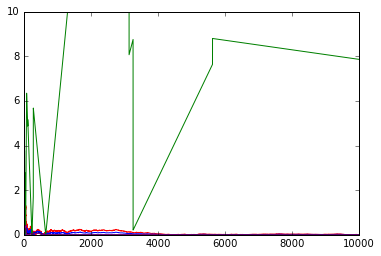

In [81]:
colors = ['red', 'blue', 'green', 'black', 'purple']
x = np.arange(N) + 1;
plt.ylim([0., theta])
plt.xlim([1., N])
for i in range(5):
    plt.plot(x, res[i], color=colors[i])
plt.show()

Если некоторые оценки (при фиксированном значении 𝜃) сильно отличаются от истинного значения параметра 𝜃,
то исключите их и постройте еще один график со всеми кривыми (для измененного значения 𝜃).
Мы видим, что зеленый график (те график для (n + 1) * X(1)) сильно отличается от тета, поэтому следующий график будет без него. (Тета поменяла в самом начале).
Для избавления от больших значений разности в начале ограничьте масштаб графика. Для наглядности точки можно соединить линиями.

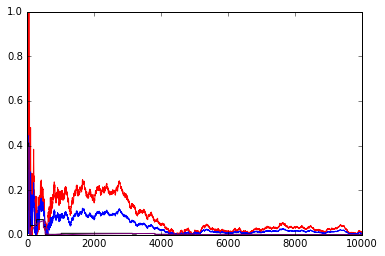

In [82]:
res.pop(2)
colors.pop(2)
plt.ylim([0, 1])
plt.xlim([1, N])
for i, y in enumerate(res):
    plt.plot(x, y, color=colors[i])
plt.show()

Какая оценка получилась лучше (в смысле упомянутого модуля разности при 𝑛 = 𝑁)? Лучше всего получились оценки - фиолетовая и черная(то есть X(n+1) + X(1) && (n+1)/n * X(n)). 
То, что именно Х(1) * (n + 1) сильно отличалась о остальных - логично, тк она единственная не состоятельная. А синяя (X + X(n) / 2) не очень хорошая, тк она смещенная. Что же касается красной (2 * X) - почему она плохая - не очень понятно, возможно, это дело случая. Поэтому построим еще 2 графика для тета равных 100 и 1000.
Проведите эксперимент для разных значений 𝜃 (количество графиков равно количеству значений 𝜃).

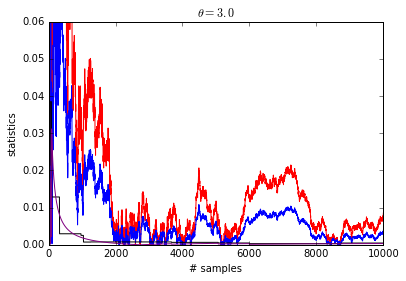

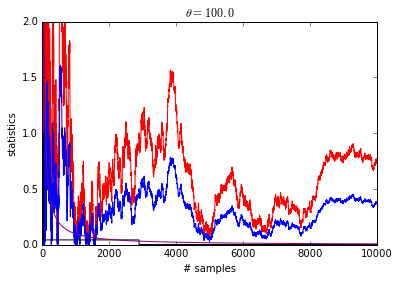

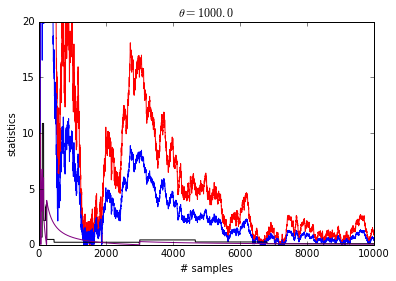

In [83]:
colors = ['red', 'blue', 'black', 'purple']
for theta in [3., 100., 1000.]:
    samples = sts.uniform.rvs(size=10000, loc=0, scale=theta)
    N = np.size(samples)
    res = [[] for i in range(4)]
    for n in range(1, N + 1) :
        res[0].append(2. * np.mean(samples[:n]))
        res[1].append(np.mean(samples[:n]) + np.max(samples[:n]) / 2.)
        res[2].append(np.min(samples[:n]) + np.max(samples[:n]))
        res[3].append((n + 1.) / n * np.max(samples[:n]))
    for i in range(4):
        res[i] = np.abs(np.array(res[i]) - theta)
    x = np.arange(N) + 1;
    plt.ylim([0., theta / 50])
    plt.xlim([1., N])
    plt.title("$\\theta = " + str(theta) + "$")
    plt.xlabel("# samples")
    plt.ylabel("statistics")
    for i in range(4):
        plt.plot(x, res[i], color=colors[i])
    plt.show()

После проведения еще двух экспериментов подтверждается, что зеленая((n + 1) * X(1)) - самая плохая оценка.
Красная(2 * Х) и синяя(X + X(n) / 2) явно проигрывают черной $(X_{(n+1)} + X_{(1)})$ и фиолетовой((n+1)/n * X(n)). Но при этом так же становится видно, что синяя() лучше красной(), а фиолетовая((n+1)/n * X(n)) лучше черной(X(n+1) + X(1)). То есть самая лучшая оценка фиолетовая((n+1)/n * X(n)).